In [4682]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
from scipy import stats
from scipy import optimize

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4683]:
from scipy.optimize import minimize

In [4684]:
np.set_printoptions(suppress=True, precision=6)

In [4685]:
from breakdown_uncertainty_me_tax import SimpleBreakdownModelClass

In [4818]:
model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.055,'rho':14.0,'gamma_max':0.012,'gamma_min':0.0193,'tau':5,'tax':0.4,'su':0.16}) #'tax':0.03813765261272659

In [4819]:
par = model.par
sol = model.sol
sim = model.sim

In [4820]:
%time model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 48s, sys: 10.3 s, total: 8min 59s
Wall time: 10min 19s


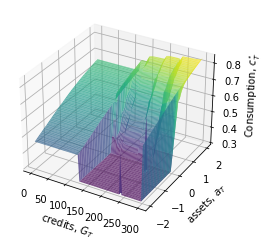

In [4821]:
# last period
a_mesh, G_mesh = np.meshgrid(par.a_grid[:],par.G_grid,indexing='ij')

t = par.T-46
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.c[t,0,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

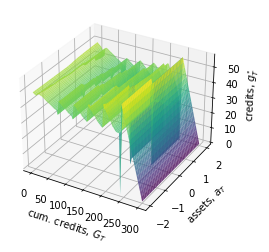

In [4822]:
t = par.T-49

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.g[t,0,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='cum. credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='credits, $g_{T}^{\star}$');

In [4823]:
sol.g[par.T-45,0,par.Na-2,:]

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      , 43.237322, 43.203685, 43.944764,  0.      ,
       51.      , 51.      , 48.875136, 47.999996, 46.383846, 45.000005,
       43.41778 , 41.905642, 40.848739, 38.999995, 38.207077, 37.149411,
       36.326542, 36.000064, 35.893731, 35.83273 , 

In [4824]:
print(sol.c_s[par.T-5,0,:,29])

[0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001
 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001 0.000001
 0.000001 0.000001 0.000001 0.000001 0.372635 0.467249 0.567087 0.619476
 0.649905 0.677196 0.714892 0.738419 0.761927 0.782463 0.804546 0.827017
 0.846239 0.866486 0.890263 0.908173 0.930611 0.952877 0.970185 0.995482
 1.011619]


In [4825]:
print(sol.g[par.T-49,0,0,:])

[48.643982 48.       47.472839 47.110565 48.346893 48.455841 48.36676
 48.04715  47.865784 47.472748 47.005463 46.468506 45.928619 45.384064
 45.       44.516418 44.137665 43.60144  43.092316 42.5896   42.099792
 41.892975 41.503693 39.       47.446655 47.052155 46.378601 45.647186
 45.       44.588745 44.105438 43.410095 42.712738 42.010712 41.739349
 41.143066 40.706726 39.       48.       47.642761 47.072571 46.158142
 45.327942 44.774506 44.164124 43.251892 42.350006 41.892975 41.151489
 40.65509  40.014954 50.637634 49.508972 48.817657 47.957336 47.094727
 45.655243 45.       44.221619 42.865723 42.       41.244324 40.57251
 39.789276 39.27182  53.802429 51.115723 50.91037  49.070251 48.
 46.41806  45.037994 43.897247 42.025635 41.295593 40.268738 39.421143
 39.045776 38.929413 38.870544  0.       57.00001  54.00001  51.00001
 48.00001  45.00001  42.00001  39.00001  36.00001  33.00001  30.00001
 27.00001  24.00001  21.00001  18.00001  15.00001  12.00001   9.00001
  6.00001   3.000

In [4826]:
sol.V_s[par.T-9,0,2,0]
sol.V_w[par.T-9,0,0]

-2000000.0

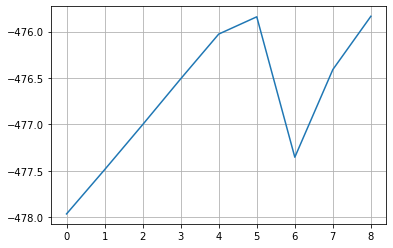

In [4827]:
y_ = [model.value_of_choice_s(2.0, 80.0, 0, 1.0, 220, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(y_)

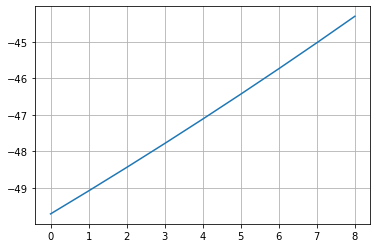

In [4828]:
z_ = [model.value_of_choice_w(2.0,0, 2.0, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(z_)

In [4829]:
model.simulate()

In [4830]:
# cb_counter = 0

# def callbackF(x, y, z):
#     global cb_counter
#     cb_counter += 1
#     print(cb_counter)
#     print("rho: %a, gamma_max: %a, gamma_min: %a" % (x, y, z))

# def pis(x,y,z):
#     callbackF(x,y,z)
    
#     model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':x,'gamma_max':y,'gamma_min':z})
#     model.solve()
#     model.simulate()


#     helper = np.array([7,6,6,5,5,5,5,5,5,5])
#     ret = np.zeros(10)
#     step = np.zeros(10)
#     for i in range(10):
#         model_a = model.copy()

#         model_a.sim.m_init[:] = i
#         model_a.sim.a_init[:] = 0.0
#         model_a.sim.e_init[:] = 0
#         model_a.simulate()

#         listen = np.mean(model_a.sim.g,axis=0)
#         listen = np.sum(listen>0.001)
#         print("Type %a = %a " % (i, listen), end = "")
#         ret[i] = listen

#         step[i] = (listen - helper[i])**2

#     print("-----------------")
#     return np.sum(step)

In [4831]:
# obj = lambda x: pis(x[0],x[1],x[2])

# res = minimize(obj,[7.35,0.0105,0.0162], method='SLSQP', callback=callbackF, options={'disp': True},constraints=({'type': 'ineq', 'fun': lambda x: 1 if x[1] < x[2] else 0}))

# print(res.x[0])

In [ ]:
def pis(x,y,z):

    model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':x,'gamma_max':y,'gamma_min':z})
    model.solve()
    model.simulate()


    helper = np.array([7,6,6,5,5])
    ret = np.zeros(5)
    step = np.zeros(5)
    for i in range(5):
        model_a = model.copy()

        model_a.sim.m_init[:] = i
        model_a.sim.a_init[:] = 0.0
        model_a.sim.e_init[:] = 0
        model_a.simulate()

        listen = np.mean(model_a.sim.g,axis=0)
        listen = np.sum(listen>0.001)
        ret[i] = listen

        step[i] = (listen - helper[i])**2

    return ret

import joblib

def printer_func(rho, gamma_max, gamma_min):
    if gamma_max < gamma_min:
        print("rho: %.5f, gamma_max: %.5f, gamma_min: %.5f - %a" % (rho, gamma_max, gamma_min, pis(rho, gamma_max, gamma_min)))
    
joblib.Parallel(n_jobs=11)(joblib.delayed(printer_func)(rho, gamma_max, gamma_min) for rho in np.linspace(10, 20, 10) for gamma_max in np.linspace(0.01, 0.015, 5) for gamma_min in np.linspace(0.016, 0.022, 5))

In [4832]:
model_a = model.copy()

model_a.sim.m_init[:] = 0
model_a.sim.a_init[:] = 0.0
model_a.sim.e_init[:] = 0
model_a.simulate()

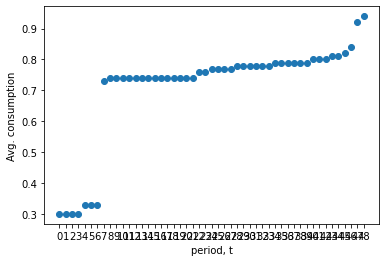

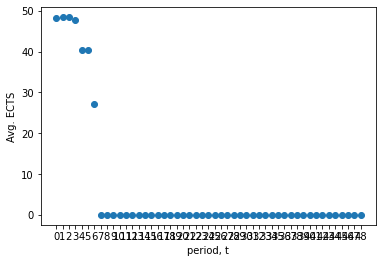

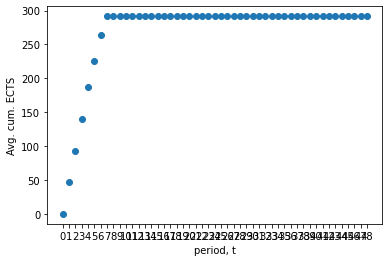

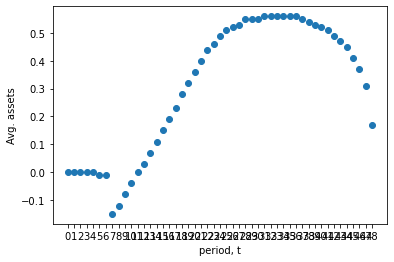

In [4833]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.g,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.G,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(par.simT));

In [4834]:
budget = np.sum(par.tax*np.mean(model_a.sim.income[:,:-1],axis=0)) - np.sum(np.mean(model_a.sim.su[:,:-1],axis=0))
print(budget)
print(np.mean(model_a.sim.income[:,:-1],axis=0))

20.27896662297919
[0.       0.       0.       0.       0.054295 0.080634 0.088664 1.288438
 1.290416 1.290526 1.291625 1.278841 1.292324 1.291046 1.294145 1.289952
 1.286438 1.290818 1.293778 1.285859 1.291046 1.289048 1.285833 1.293704
 1.29053  1.290124 1.293608 1.291051 1.283021 1.285335 1.286327 1.291294
 1.291069 1.289168 1.279738 1.289965 1.291002 1.283376 1.282497 1.286401
 1.288207 1.286661 1.290887 1.286124 1.288307 1.28813  1.282926 1.288242]


In [4835]:
# def zero_budget(tax):
#     model_a_2 = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'rho':11,'gamma_max':0.008,'gamma_min':0.0178,'tau':5,'su':0.5,'tax':tax})
#     model_a_2.solve()
#     model_a_2.simulate()
#     return (np.sum(tax*np.mean(model_a_2.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(model_a_2.sim.su[:,:-1],axis=0))))

# res = optimize.root_scalar(zero_budget, bracket=[0.0, 0.99], method='brentq')

In [4836]:
#print(res)

In [4837]:
asset_sim = model_a.sim.a
asset_sim[2]

array([ 0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.1632  , -0.201951, -0.100503,  0.062569,  0.110244,
        0.091941,  0.051339,  0.050653, -0.085355, -0.09944 , -0.09942 ,
       -0.016501,  0.124675,  0.133639,  0.241195,  0.268748,  0.227748,
        0.264019,  0.309692,  0.427134,  0.413035,  0.60093 ,  0.55744 ,
        0.545803,  0.620009,  0.442604,  0.480324,  0.538087,  0.453873,
        0.463331,  0.503358,  0.563882,  0.535468,  0.577442,  0.596715,
        0.64849 ,  0.594311,  0.506233,  0.48767 ,  0.428906,  0.322319,
        0.190081])

In [4838]:
cons_sim = model_a.sim.c
#cons_sim[6]

np.mean(model_a.sim.g,axis=0)

array([48.248044, 48.406077, 48.370837, 47.638709, 40.311334, 40.370257,
       27.217979,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ])

In [4839]:
cc_sim = model_a.sim.G
cc_sim[2,par.T-1]

for i in range(100):
    print(cc_sim[i,par.T-1])

300.00001
182.7279222625168
300.00001
192.59436439423592
182.72815396564292
300.00001
300.00001
300.00001
300.00001
300.00001
182.7430166054852
187.06038287227608
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001000000003
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
184.32732839156134
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001000000003
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001000000003
300.00001000000003
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
300.00001
30

In [4840]:
credit_sim = model_a.sim.a
credit_sim[7]

array([ 0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.      , -0.1632  , -0.108408, -0.053597,  0.07636 ,  0.172877,
        0.257336,  0.306972,  0.337244,  0.359703,  0.336923,  0.321927,
        0.201046,  0.344572,  0.340342,  0.346965,  0.281148,  0.515862,
        0.429097,  0.440381,  0.495634,  0.40698 ,  0.570244,  0.763081,
        0.776539,  0.986605,  0.994776,  1.068563,  1.054926,  1.07785 ,
        1.088753,  1.053842,  1.023613,  0.838962,  0.79353 ,  0.833864,
        0.699694,  0.635709,  0.523367,  0.4065  ,  0.335196,  0.369495,
        0.08337 ])

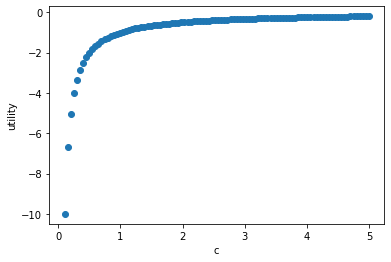

In [4841]:
liste = []
liste_2 = []
g_list = []
c_list = []

for g in np.linspace(0,300,num=300):
    hm = model.util_s(1.0,g,0,29)
    liste.append(hm)
    g_list.append(g)

for c in np.linspace(0.1,5,num=100):
    hm = model.util_s(c, 0, 0, 29)
    liste_2.append(hm)
    c_list.append(c)

fig, ax = plt.subplots()
ax.scatter(c_list,liste_2)
ax.set(xlabel='c',ylabel='utility');

In [4842]:
import math

beta = 0.1*np.sqrt(6)/math.pi

seed=69
rng = np.random.default_rng(seed=seed)


sim.xi = rng.gumbel(loc=0.0, scale=beta, size=10)
sim.xi

array([ 0.011003,  0.022603, -0.05413 , -0.022066,  0.033903, -0.041217,
        0.01871 ,  0.043118,  0.371854, -0.009851])

In [4843]:
# Parameters
h1 = 0.1*np.sqrt(6)/math.pi  # Scale parameter
#mu = 0.0

h2 = -h1 * np.euler_gamma  # Location parameter to center the distribution around zero

# Generate Gumbel-distributed preference shocks centered around zero
preference_shocks = rng.gumbel(h2, h1, size=1000000)

# Calculate the mean (expected value) of the preference shocks
mean_preference_shock = np.mean(preference_shocks)
print("Mean preference shock:", mean_preference_shock)

print(preference_shocks)

Mean preference shock: 8.767314582737433e-05
[-0.078835 -0.06076  -0.137456 ...  0.03517  -0.034345  0.118217]


In [4844]:
loc, scale = 1, 0.1
rv = stats.truncnorm(-1, 0, loc=loc, scale=scale)
r = rv.rvs(size=1000)

In [4845]:
print(r)

[0.945079 0.907399 0.969858 0.904563 0.983292 0.999609 0.907683 0.964422
 0.98022  0.993956 0.947551 0.993583 0.999542 0.911629 0.925272 0.910769
 0.957064 0.995731 0.96632  0.900483 0.94387  0.936154 0.900653 0.922732
 0.996601 0.944751 0.962909 0.965041 0.984267 0.981034 0.913629 0.930782
 0.939112 0.979001 0.962623 0.941981 0.935411 0.983934 0.938567 0.956444
 0.99839  0.960959 0.961308 0.964877 0.929224 0.927784 0.99611  0.967201
 0.964435 0.940314 0.90421  0.990906 0.999436 0.949924 0.941405 0.991297
 0.920114 0.947983 0.944278 0.915464 0.906434 0.954536 0.920266 0.95278
 0.981299 0.995539 0.999506 0.980675 0.986521 0.974319 0.920034 0.959779
 0.959848 0.974852 0.935213 0.9886   0.953417 0.93464  0.95822  0.940977
 0.944826 0.928739 0.912401 0.925793 0.966303 0.974549 0.996801 0.920726
 0.991335 0.978881 0.977254 0.933817 0.944612 0.936698 0.901798 0.963302
 0.901889 0.967626 0.999514 0.902457 0.961263 0.90817  0.906351 0.989707
 0.988036 0.961651 0.923991 0.952405 0.988308 0.9758

In [4846]:
from consav.quadrature import log_normal_gauss_hermite


par.xi_grid,par.xi_weight = log_normal_gauss_hermite(0.1,10,mu=1.0)

In [4847]:

for i in range(10):
    if par.xi_grid[i]>1.0:
        par.xi_grid[i] = 1.0

par.xi_grid

array([0.612047, 0.69546 , 0.776132, 0.859333, 0.947912, 1.      ,
       1.      , 1.      , 1.      , 1.      ])

In [4848]:
par.xi_weight

array([0.000004, 0.000758, 0.019112, 0.135484, 0.344642, 0.344642,
       0.135484, 0.019112, 0.000758, 0.000004])

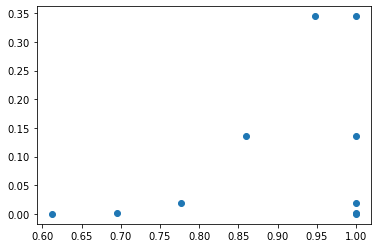

In [4849]:
fig, ax = plt.subplots()
ax.scatter(par.xi_grid,par.xi_weight)
ax.set(xlabel='',ylabel='');

In [4850]:
shape = (par.simN, par.simT)  

sim.xi = np.exp(par.sigma_s*rng.normal(size=shape) - 0.5*par.sigma_s**2)

  

for i in range(par.simN):
    for t in range(par.simT):
        if sim.xi[i,t]>1.0:
            sim.xi[i,t] = 1.0

sim.xi

array([[1.      , 0.970862, 1.      , ..., 0.932499, 0.960857, 1.      ],
       [0.988406, 1.      , 0.987712, ..., 1.      , 1.      , 0.964833],
       [0.953003, 1.      , 0.843424, ..., 1.      , 0.964972, 0.974401],
       ...,
       [0.871879, 1.      , 0.94414 , ..., 1.      , 1.      , 1.      ],
       [0.813058, 0.947842, 0.86037 , ..., 1.      , 0.793786, 0.972387],
       [0.946311, 0.935871, 0.949197, ..., 1.      , 0.904459, 1.      ]])